In [13]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
###############Constante 2m/(hc)^2
m = 0.511 # masa del electrón [MeV /c^2]
hc = 0.197 # Cte Planck*c [MeV * pm
Cte = 2.*m/(hc*hc) #Constente en [MeV^-1 pm^-2]


In [15]:
def f(x, y):    
    """Esta función calcula las funciones f^(0) y f^(1) de la forma estándar
    en la solución de la ODE.
    
    Parámetros: 
        x: punto a ser evaluado
        y: arreglo que contiene los valores de y^(0) y y^(1) de a forma estándar
            en la solición de la EDO
    
    Salida:
        f: arregloq ue contiene las funciones f^(0) y f^(1) evaluadas 
    """
    f = np.zeros(2,float)
    f[0] = y[1]               #Forma estándar f^(0)
    f[1] = Cte*(V(x) -E)*y[0] #Forma estándar f^(1)
    return f

In [16]:
#Constantes para el potencial
a = 10. #Longitud del pozo en [pm]
Vx = -10. #Potencial en [Mev]

def V(x: float)->float:
    """Esta función calcula el potencial cumpliendo con la condición 
    en el infinito
    
    Parámetros:
        x: punto donde se quiere obtener el potencial
    Salida:
        Valor del potencial
    """
    
    if abs(x) <= a :    return Vx
    else:   return 0.

In [17]:
def rk4Algor(x,h,N,y,f): 
    """Esta función resulve la ODE por runge kutta orden 4
    
    Parámetros:
        x: puntos donde se evaluará
        h: longitud del salto en el cálculo de la integral
        N: longitud de los arreglos para el cálculo en varias variables
        y: variable donde se guardaran los resultados
        f: funcion que calcula las formas estándares f^(0) y f^(1) en el algoritmo
        
    Salida:
        y: un arreglo que contiene todos los puntos evaluados en la solución de la EDO
    
    """
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(x,y)                             
    k2 = h*f(x+h/2.,y+k1/2.)
    k3 = h*f(x+h/2.,y+k2/2.)
    k4 = h*f(x+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y  

In [18]:
Xinf = a*5 #Infinito -> no hacer muy grande porque si no tocamos overflow

def diff(h, E):
    """Esta función calcula la solución para la función de onda por izquierda 
    y por derecha y las conecta en el punto de pegado. Además evalúa la 
    condición de continuidad para la función y su derivada.
    
    Paránmetros:
        h: longitud de los pasos en el cálculo de la derivada
        E: Valor de la energía
    Salida:
        Regresa de Delta para la condición de continuidad de la función 
        de onda y su deriavda
    
    """
    kappa = np.sqrt(-E*Cte) 
    f_onda = 1/np.exp(kappa*Xinf)  

    y = np.zeros(2, float)      #Arreglo que contendrá la función de onda y su derivada
    x_m = Nsteps//3            #Encajando el x_m de pegado para los pasos
    nL = x_m + 1
    y[0] = f_onda       #Inicialización de la función de onda izq en infinito
    y[1] = kappa*y[0]   #Derivada de la función de onda izq en infinito
    for ix in range(0, nL+1):  #Va de -X_inf hasta el punto de pegado
        x = h * (ix - Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    izq= y[1]/y[0]        #Derivada logarítmica por izq
    y[0] = f_onda         #Inicializa la función de onda dcha en infinito
    y[1] = -kappa*y[0]    #Derivada de la fun. de onda derecha en infinito
    for ix in range (Nsteps, nL + 1, -1):  #Va de X_inf hasta el x_m en reversa
        x = h*(ix + 1 - Nsteps/2)
        y = rk4Algor(x, -h, 2, y, f)    #Integración en reversa
    dcha = y[1]/y[0]               #Derivadas logaritmicas
    return ((izq- dcha)/(izq + dcha))

In [19]:
Xinf = a*5 #Infinito -> no hacer muy grande porque si no tocamos overflow

def diff(h, E):
    kappa = np.sqrt(-E*Cte) 
    f_onda = 1/np.exp(kappa*Xinf)  
    
    #Cálculo por la izquierda
    y = np.zeros(2, float)      #Arreglo que contendrá la función de onda y su derivada
    x_m = Nsteps//3            #Encajando el x_m de pegado para los pasos
    nL = x_m + 1
    y[0] = f_onda       #Inicialización de la función de onda izq en infinito
    y[1] = kappa*y[0]   #Derivada de la función de onda izq en infinito
    for ix in range(0, nL+1):  #Va de -X_inf hasta el punto de pegado
        x = h * (ix - Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    izq= y[1]/y[0]        #Derivada logarítmica por izq
    
    #Cálculo por la derecha
    y[0] = f_onda         #Inicializa la función de onda dcha en infinito
    y[1] = -kappa*y[0]    #Derivada de la fun. de onda derecha en infinito
    for ix in range (Nsteps, nL + 1, -1):  #Va de X_inf hasta el x_m en reversa
        x = h*(ix + 1 - Nsteps/2)
        y = rk4Algor(x, -h, 2, y, f)    #Integración en reversa
    dcha = y[1]/y[0]               #Derivadas logaritmicas
    
    
    return ((izq- dcha)/(izq + dcha))

In [20]:
def plot(h,E):
    Lwf = []    #Función de onda por la izquierda
    Rwf = []    #Función de onda por la derecha
    xR = []     #x para Rwf
    xL = []     #x para Lwf
    Nsteps = 1501       #No. de pasos para la integración de la ODE
    y = np.zeros(2, float) #Arreglo apr ala fun de onda y su derivada
    yL = np.zeros ((2,505), float) #Arreglo auxiliar para calcular las fun de onda
    i_match = 500   #Radio de pegado
    nL = i_match + 1
    
    #Cálculo de la fun. de onda en el infinito
    kappa = np.sqrt(-E*Cte) 
    f_onda = 1/np.exp(kappa*Xinf)  
    
    
    #Cálculo de la fun de onda por la izquierda
    y[0] = f_onda      #Función de onda izquierda inicial
    #y[1] = kappa*y[0]  #Derivada valuada en x<0
    
    for ix in range(0, nL + 1):
        yL[0][ix] = y[0]
        yL[1][ix] = y[1]
        x = h * (ix - Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    
    #Cálculo función de onda por derecha    
    y[0] = f_onda 
    y[1] = kappa*y[0]
    for ix in range(Nsteps - 1, nL + 2, -1):    #Función de onda derecha
        x = h * (ix + 1 - Nsteps/2)     #Integración
        y = rk4Algor(x, -h, 2, y, f)
        xR.append(x)
        Rwf.append(y[0])
    #Normalización para que la onda izquierda encaje con la derecha
    norm = y[0]/yL[0][nL]
    for ix in range(0,nL + 1):  #Normaliza la función de onda izquierda y la deriva
        x = h*(ix - Nsteps/2 +1)
        y[0] = yL[0][ix]*norm
        y[1] = yL[1][ix]*norm
        xL.append(x)
        Lwf.append(y[0])    
    return xL,Lwf,xR,Rwf

Iteración 0, E = -17.2833


<ipython-input-19-e13afb60a977>:5: RuntimeWarning: overflow encountered in exp
  f_onda = 1/np.exp(kappa*Xinf)
<ipython-input-19-e13afb60a977>:16: RuntimeWarning: invalid value encountered in double_scalars
  izq= y[1]/y[0]        #Derivada logarítmica por izq
<ipython-input-19-e13afb60a977>:24: RuntimeWarning: invalid value encountered in double_scalars
  dcha = y[1]/y[0]               #Derivadas logaritmicas
<ipython-input-20-d9c00dbbcae5>:14: RuntimeWarning: overflow encountered in exp
  f_onda = 1/np.exp(kappa*Xinf)
<ipython-input-20-d9c00dbbcae5>:36: RuntimeWarning: invalid value encountered in double_scalars
  norm = y[0]/yL[0][nL]


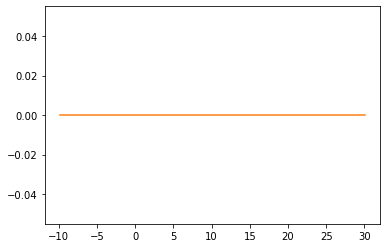

Iteración 1, E = -18.8417


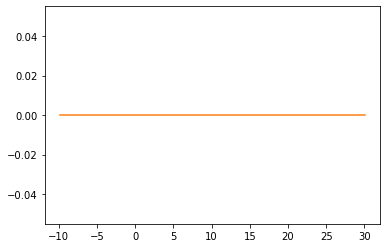

Iteración 2, E = -19.6208


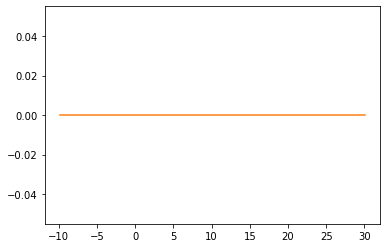

Iteración 3, E = -20.0104


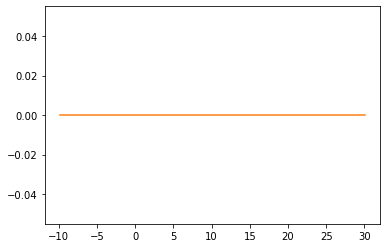

Iteración 4, E = -20.2052


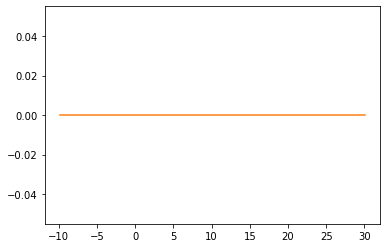

Iteración 5, E = -20.3026


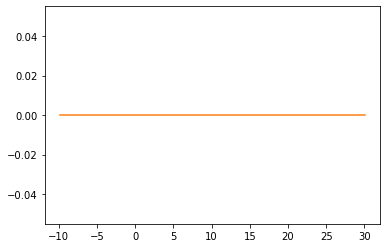

Iteración 6, E = -20.3513


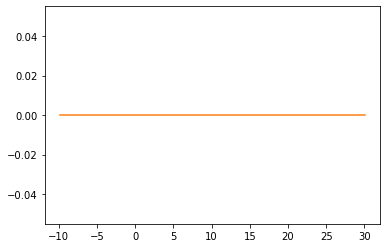

Iteración 7, E = -20.3757


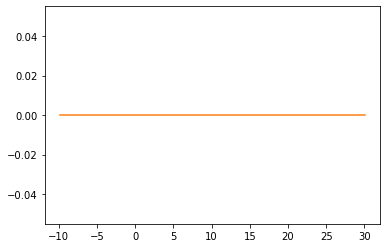

Iteración 8, E = -20.3878


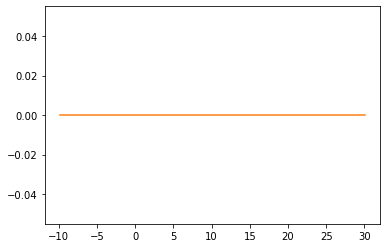

Iteración 9, E = -20.3939


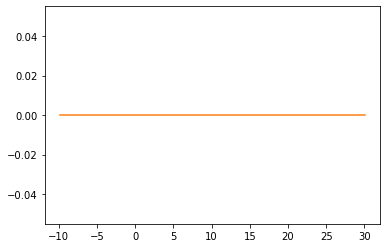

Iteración 10, E = -20.3970


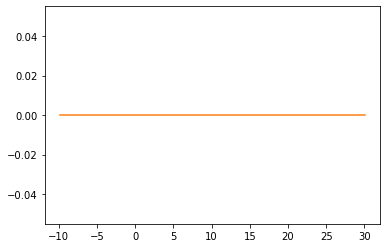

Iteración 11, E = -20.3985


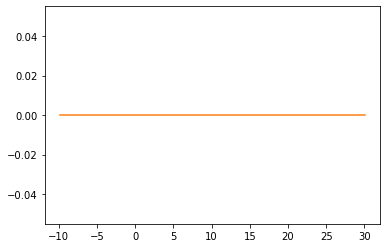

Iteración 12, E = -20.3992


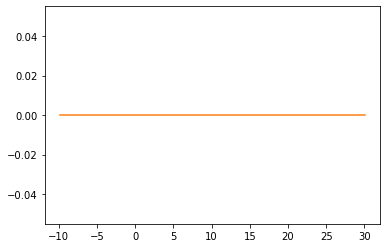

Iteración 13, E = -20.3996


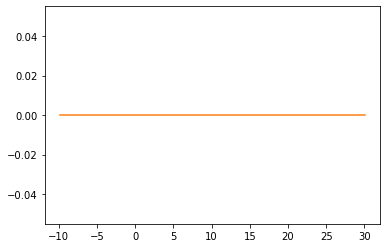

Iteración 14, E = -20.3998


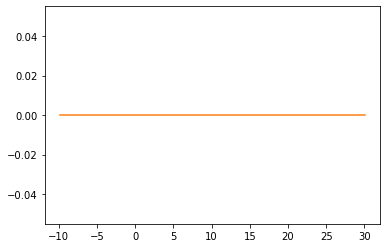

Iteración 15, E = -20.3999


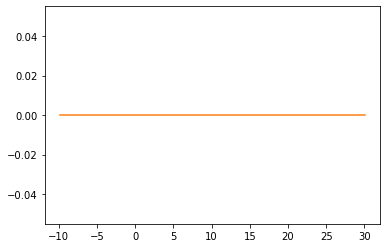

Iteración 16, E = -20.4000


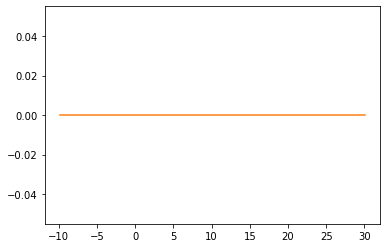

Iteración 17, E = -20.4000


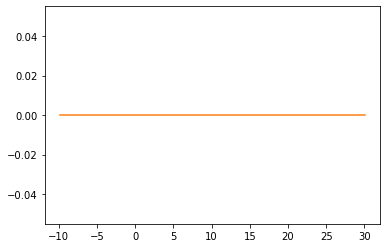

Iteración 18, E = -20.4000


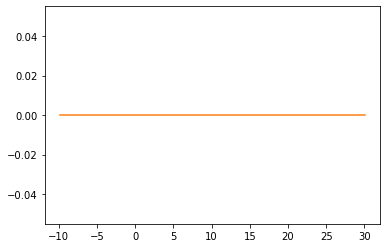

Iteración 19, E = -20.4000


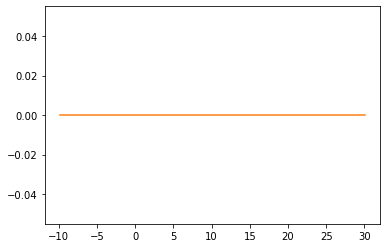

Iteración 20, E = -20.4000


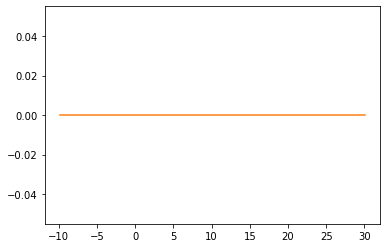

Iteración 21, E = -20.4000


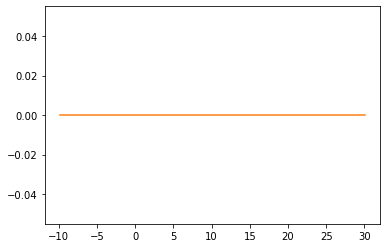

Iteración 22, E = -20.4000


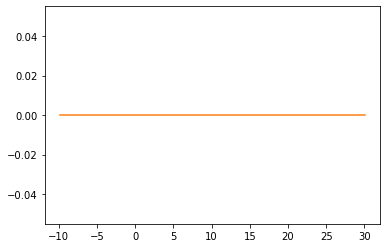

Iteración 23, E = -20.4000


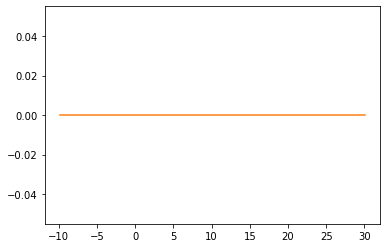

Iteración 24, E = -20.4000


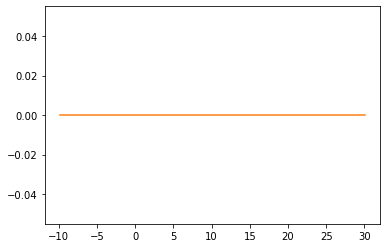

Iteración 25, E = -20.4000


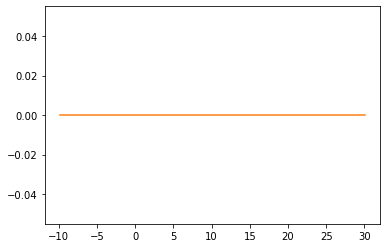

Iteración 26, E = -20.4000


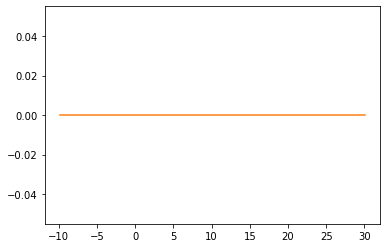

Iteración 27, E = -20.4000


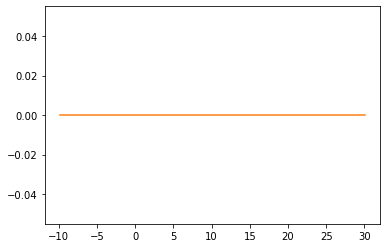

Iteración 28, E = -20.4000


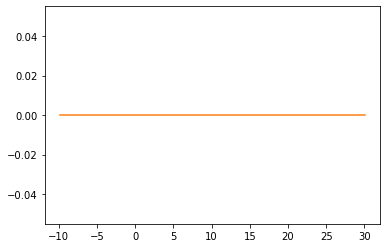

Iteración 29, E = -20.4000


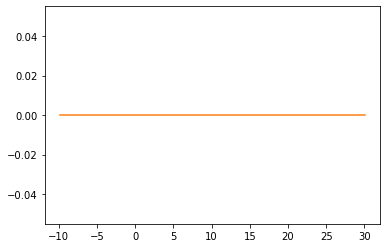

Iteración 30, E = -20.4000


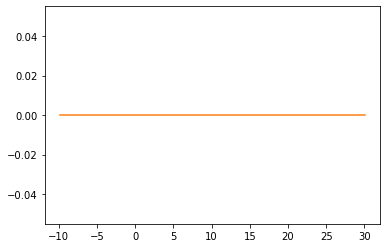

Iteración 31, E = -20.4000


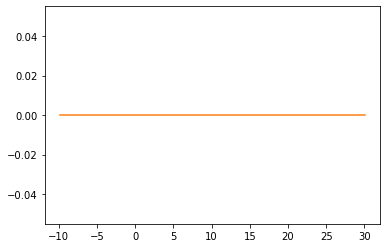

Iteración 32, E = -20.4000


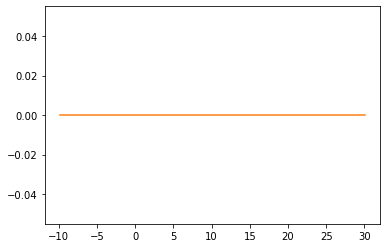

Iteración 33, E = -20.4000


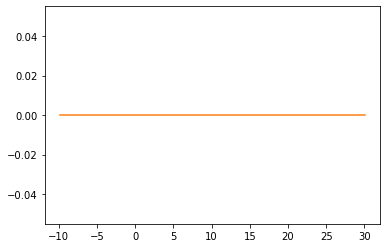

Iteración 34, E = -20.4000


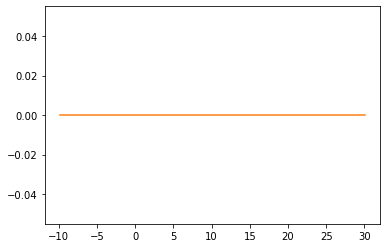

Iteración 35, E = -20.4000


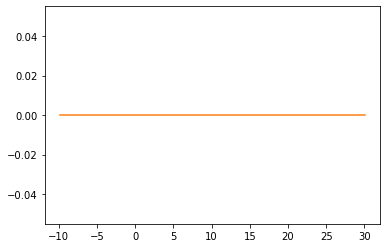

Iteración 36, E = -20.4000


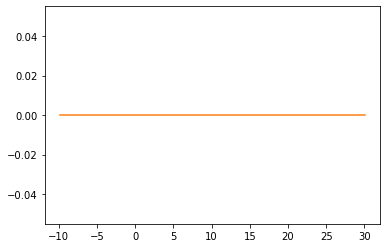

Iteración 37, E = -20.4000


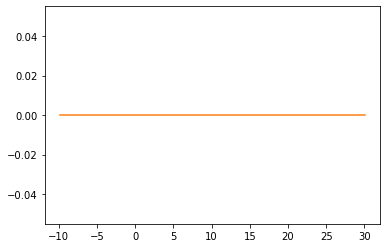

Iteración 38, E = -20.4000


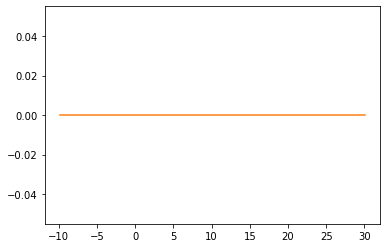

Iteración 39, E = -20.4000


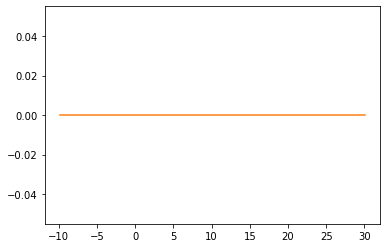

Iteración 40, E = -20.4000


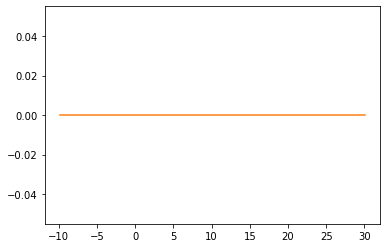

Iteración 41, E = -20.4000


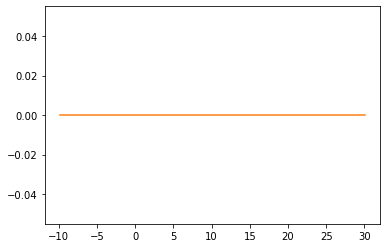

Iteración 42, E = -20.4000


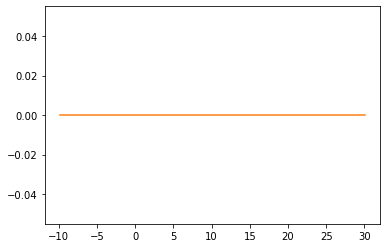

Iteración 43, E = -20.4000


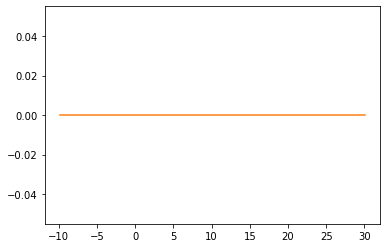

Iteración 44, E = -20.4000


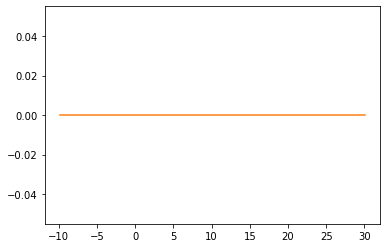

Iteración 45, E = -20.4000


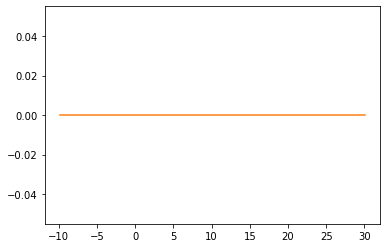

Iteración 46, E = -20.4000


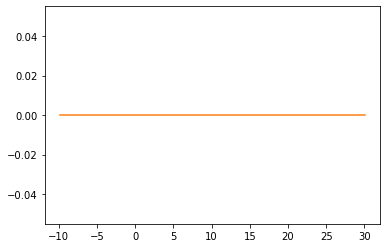

Iteración 47, E = -20.4000


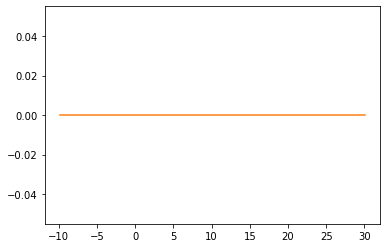

Iteración 48, E = -20.4000


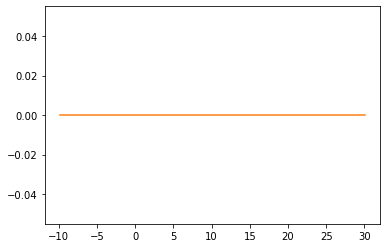

Iteración 49, E = -20.4000


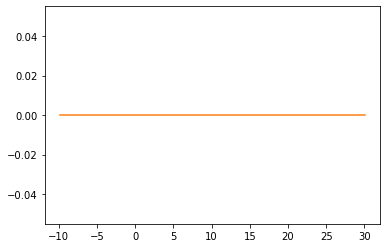

Iteración 50, E = -20.4000


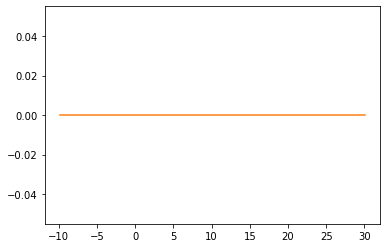

Iteración 51, E = -20.4000


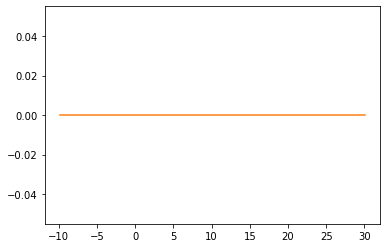

Iteración 52, E = -20.4000


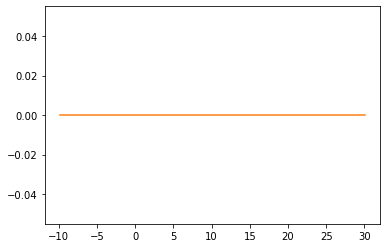

Iteración 53, E = -20.4000


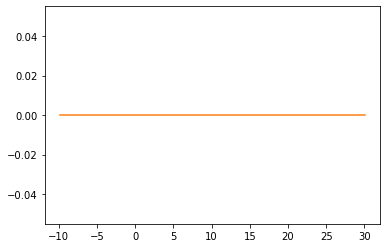

Iteración 54, E = -20.4000


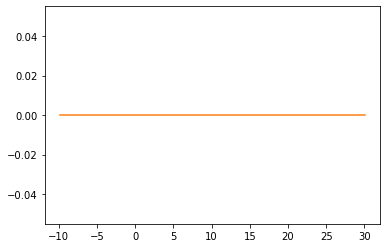

Iteración 55, E = -20.4000


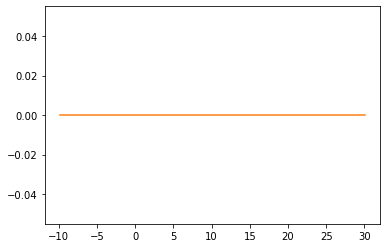

Iteración 56, E = -20.4000


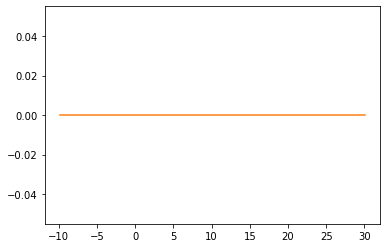

Iteración 57, E = -20.4000


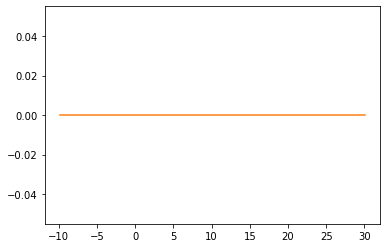

Iteración 58, E = -20.4000


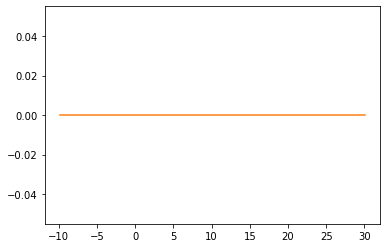

Iteración 59, E = -20.4000


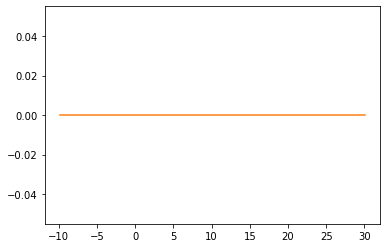

Iteración 60, E = -20.4000


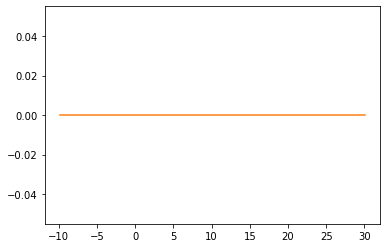

Iteración 61, E = -20.4000


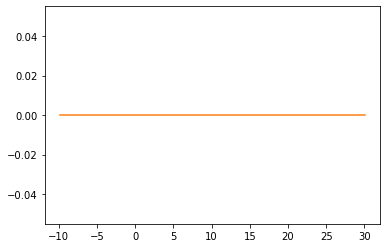

Iteración 62, E = -20.4000


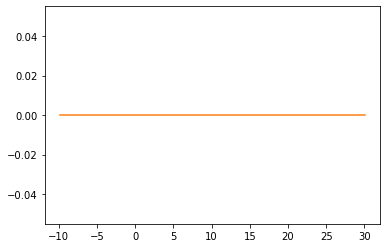

Iteración 63, E = -20.4000


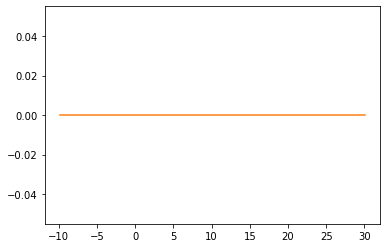

Iteración 64, E = -20.4000


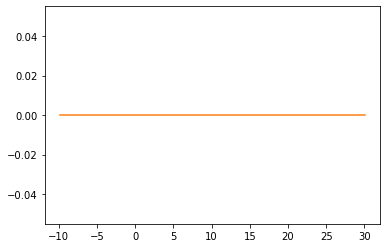

Iteración 65, E = -20.4000


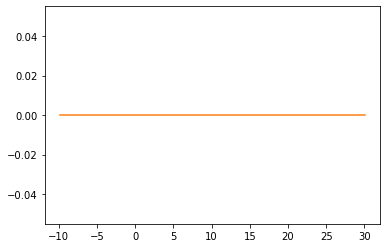

Iteración 66, E = -20.4000


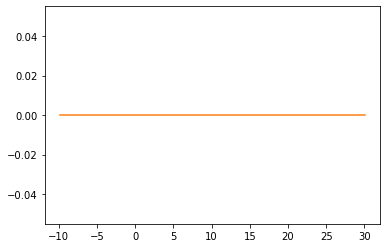

Iteración 67, E = -20.4000


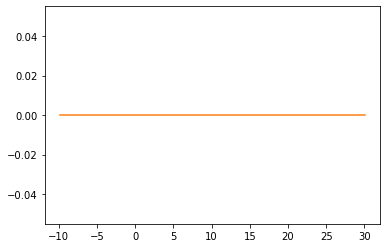

Iteración 68, E = -20.4000


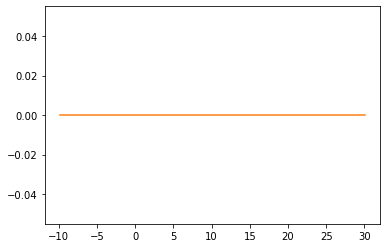

Iteración 69, E = -20.4000


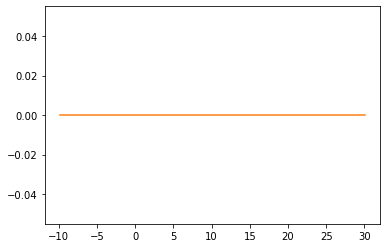

Iteración 70, E = -20.4000


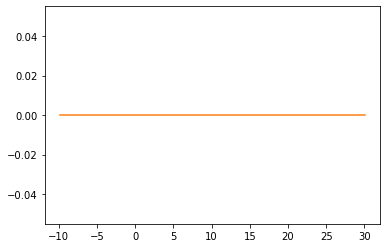

Iteración 71, E = -20.4000


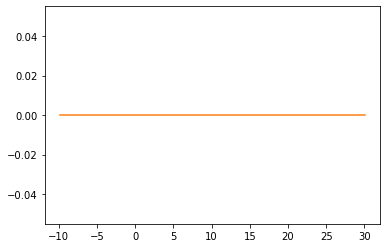

Iteración 72, E = -20.4000


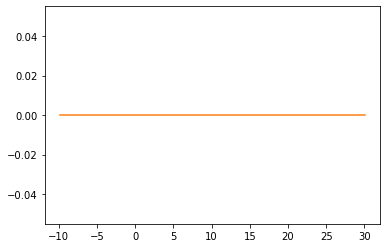

Iteración 73, E = -20.4000


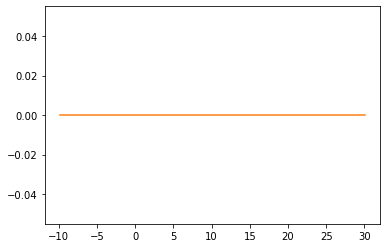

Iteración 74, E = -20.4000


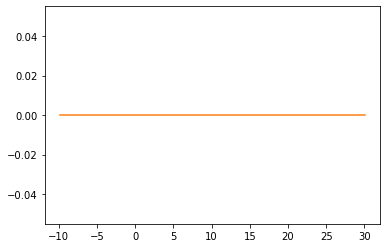

Iteración 75, E = -20.4000


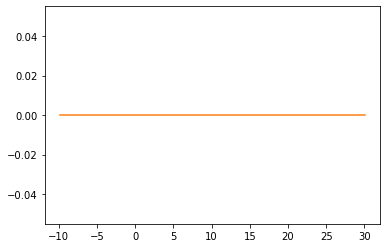

Iteración 76, E = -20.4000


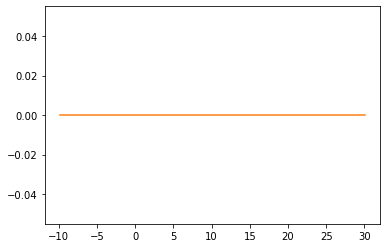

Iteración 77, E = -20.4000


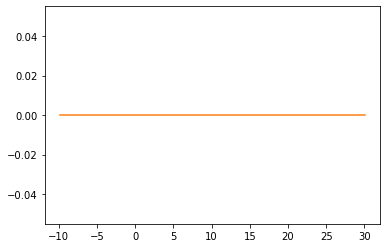

Iteración 78, E = -20.4000


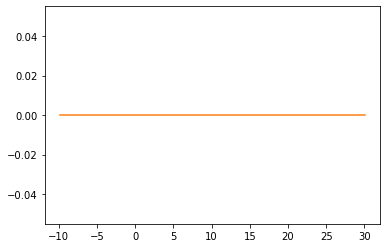

Iteración 79, E = -20.4000


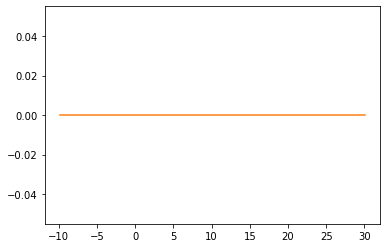

Iteración 80, E = -20.4000


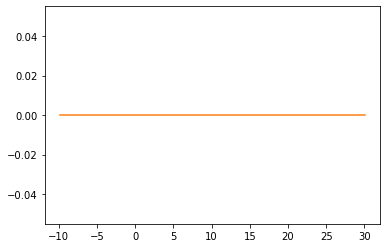

Iteración 81, E = -20.4000


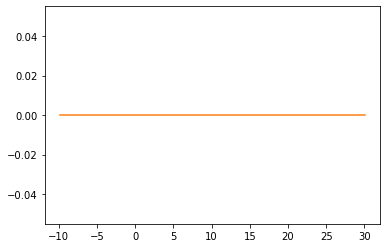

Iteración 82, E = -20.4000


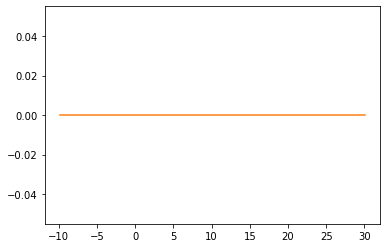

Iteración 83, E = -20.4000


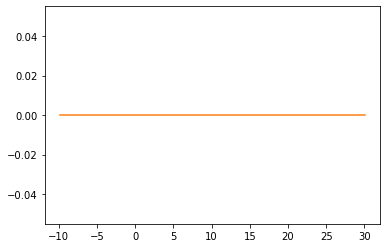

Iteración 84, E = -20.4000


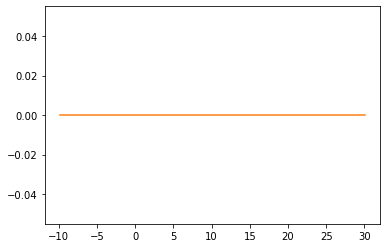

Iteración 85, E = -20.4000


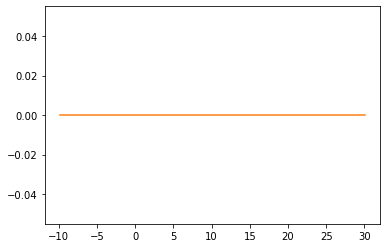

Iteración 86, E = -20.4000


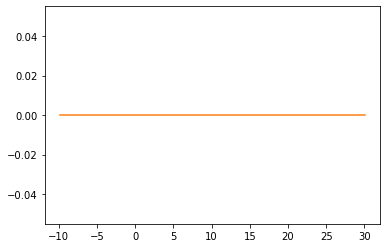

Iteración 87, E = -20.4000


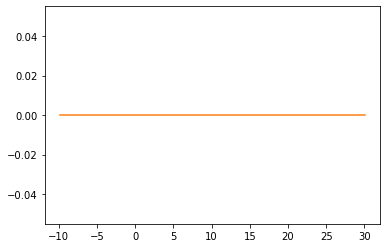

Iteración 88, E = -20.4000


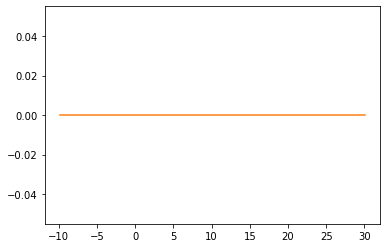

Iteración 89, E = -20.4000


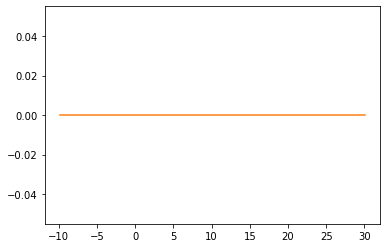

Iteración 90, E = -20.4000


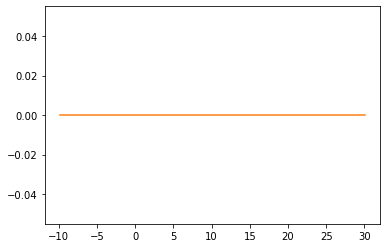

Iteración 91, E = -20.4000


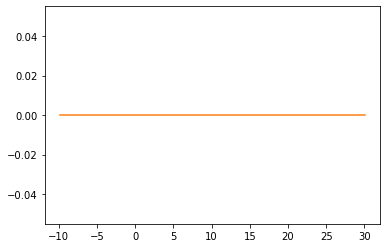

Iteración 92, E = -20.4000


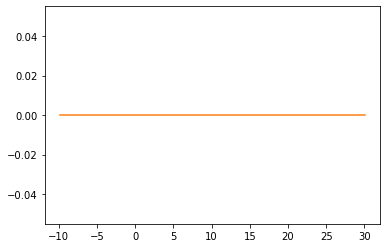

Iteración 93, E = -20.4000


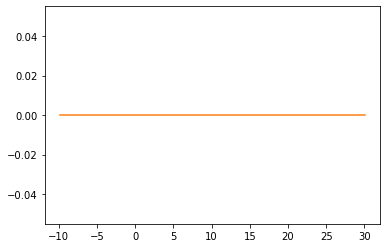

Iteración 94, E = -20.4000


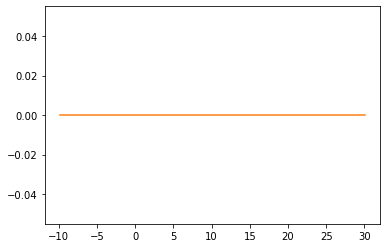

Iteración 95, E = -20.4000


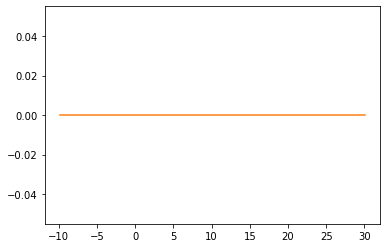

Iteración 96, E = -20.4000


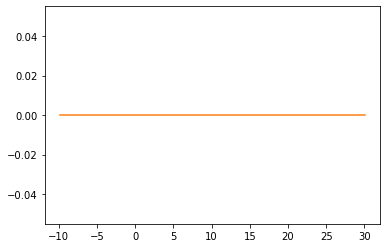

Iteración 97, E = -20.4000


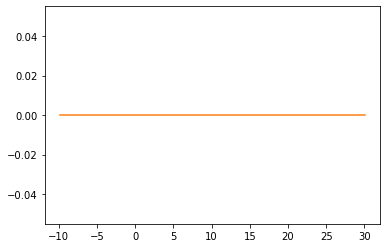

Iteración 98, E = -20.4000


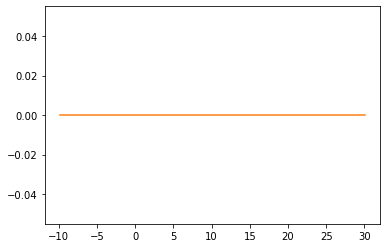

Iteración 99, E = -20.4000


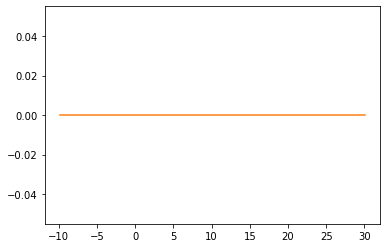

Eigenvalor final E = -20.4000
Iteraciones = , max = 100


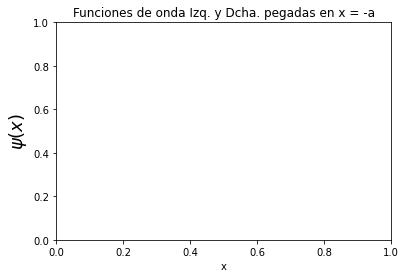

In [21]:
####Parte principal    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()  

################ Constantes
eps = 1e-2; Nsteps = 501; h = 0.04; Nmax = 100 #Parámetros
E = -17.0; Emax = 1.2*E; Emin = E/1.2

for i in range (0, Nmax):     
    E = (Emax + Emin)/2                 #Rango de bisección
    #Algoritmo de bisección
    Diff = diff(h, E)
    Eaux = E
    E = Emax
    diffMax = diff(h,E)
    E = Eaux
    if (diffMax * Diff > 0):    
        Emax = E    
    else:   
        Emin = E
    print(f'Iteración {i}, E = {E:.4f}')
      
    fig.clear()
    x_izq, onda_izq, x_dcha, onda_dcha = plot(h,E)
    plt.plot(x_izq, onda_izq)
    plt.plot(x_dcha,onda_dcha)
    plt.pause(0.8)  #Pausa entre figuras
    
    if (abs(Diff) < eps ):  break


plt.xlabel('x')
plt.ylabel('$\psi(x) $', fontsize = 18)
plt.title('Funciones de onda Izq. y Dcha. pegadas en x = -a')

print(f'Eigenvalor final E = {E:.4f}')
print(f'Iteraciones = {_}, max = {Nmax}')
plt.show()


Iteración 0, E = -17.0773


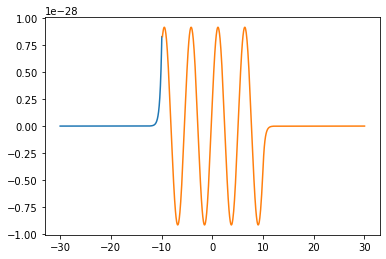

Iteración 1, E = -17.8886


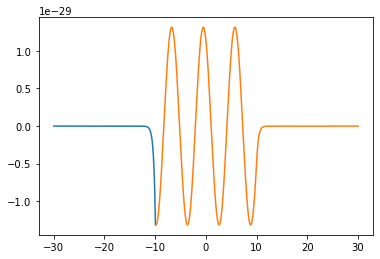

Iteración 2, E = -17.4830


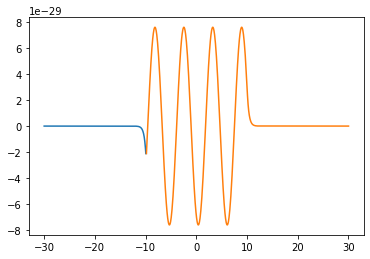

Iteración 3, E = -17.6858


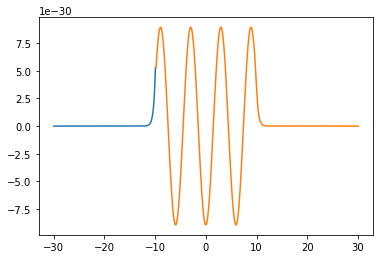

Iteración 4, E = -17.5844


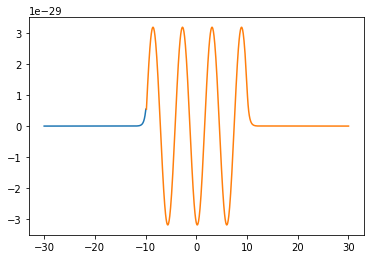

Iteración 5, E = -17.6351


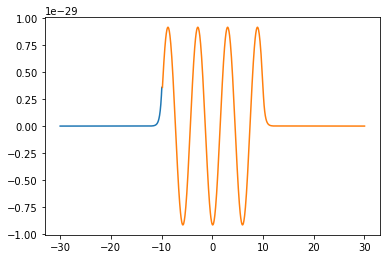

Iteración 6, E = -17.6604


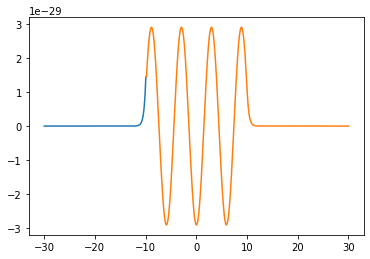

Iteración 7, E = -17.6478


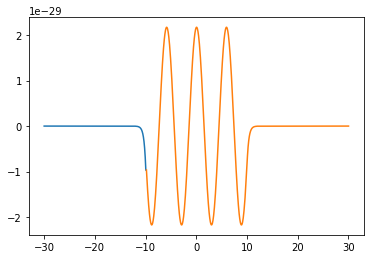

Iteración 8, E = -17.6541


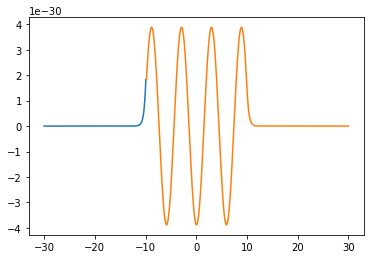

Iteración 9, E = -17.6509


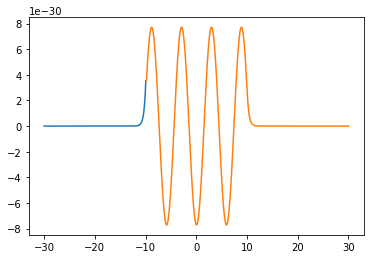

Eigenvalor final E = -17.6509
Iteraciones = 9, max = 100


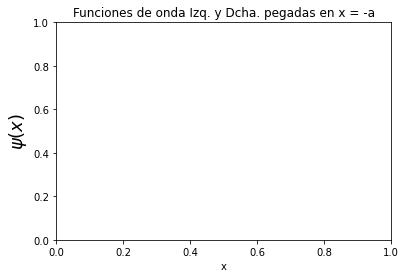

In [24]:
# -*- coding: utf-8 -*-
"""
@author: Julio C. Torreblanca
"""

import numpy as np
import matplotlib.pyplot as plt

################ Constantes
eps = 1e-2; Nsteps = 501; h = 0.04; Nmax = 100 #Parámetros
E = -17.0; Emax = 1.1*E; Emin = E/1.1

###############Constante 2m/(hc)^2
m = 0.511 #masa del electrón [MeV /c^2]
hc = 0.197 #0.4829 Planck*c [MeV * pm]
#Cte = 2.*m/(hc*hc)
Cte=0.4829
###############Constantes del pozo de potencial
a = 10. #Longitud del pozo en [pm]
Vx = -20. #Potencial en [Mev]
Xinf = a*3#Infinito -> no hacer muy grande porque si no tocamos overflow




############### Funciones

    
    
def f(x, y):
    """Esta función calcula las funciones f^(0) y f^(1) de la forma estándar
    en la solución de la ODE.
    
    Parámetros: 
        x: punto a ser evaluado1
        y: arreglo que contiene los valores de y^(0) y y^(1) de a forma estándar
            en la solición de la EDO
    
    Salida:
        f: arregloq ue contiene las funciones f^(0) y f^(1) evaluadas 
    """
    #global E
    F = np.zeros(2,float)
    F[0] = y[1]               #Forma estándar f^(0)
    F[1] = -(Cte)*(E-V(x))*y[0] #Forma estándar f^(1)
    return F

def V(x: float)->float:
    """Esta función calcula el potencial cumpliendo con la condición 
    en el infinito
    
    Parámetros:
        x: punto donde se quiere obtener el potencial
    Salida:
        Valor del potencial
    """
    
    if abs(x) <= a :    return Vx
    else:   return 0.



def rk4Algor(x,h,N,y,f): 
    """Esta función resulve la ODE por runge kutta orden 4
    
    Parámetros:
        x: puntos donde se evaluará
        h: longitud del salto en el cálculo de la integral
        N: longitud de los arreglos para el cálculo en varias variables
        y: variable donde se guardaran los resultados
        f: funcion que calcula las formas estándares f^(0) y f^(1) en el algoritmo
        
    Salida:
        y: un arreglo que contiene todos los puntos evaluados en la solución de la EDO
    
    """
    k1=np.zeros(N); k2=np.zeros(N); k3=np.zeros(N); k4=np.zeros(N)
    k1 = h*f(x,y)                             
    k2 = h*f(x+h/2.,y+k1/2.)
    k3 = h*f(x+h/2.,y+k2/2.)
    k4 = h*f(x+h,y+k3)
    y=y+(k1+2*(k2+k3)+k4)/6.
    return y  


def diff(h, E):
    """Esta función calcula la solución para la función de onda por izquierda 
    y por derecha y las conecta en el punto de pegado. Además evalúa la 
    condición de continuidad para la función y su derivada.
    
    Paránmetros:
        h: longitud de los pasos en el cálculo de la derivada
        E: Valor de la energía
    Salida:
        Regresa de Delta para la condición de continuidad de la función 
        de onda y su deriavda
    
    """
    kappa = np.sqrt(-E*Cte) 
    f_onda = 1/np.exp(kappa*Xinf)  
    
    #Cálculo por la izquierda
    y = np.zeros(2, float)      #Arreglo que contendrá la función de onda y su derivada
    x_m = Nsteps//3            #Encajando el x_m de pegado para los pasos
    nL = x_m + 1
    y[0] = f_onda       #Inicialización de la función de onda izq en infinito
    y[1] = kappa*y[0]   #Derivada de la función de onda izq en infinito
    for ix in range(0, nL+1):  #Va de -X_inf hasta el punto de pegado
        x = h * (ix - Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    izq= y[1]/y[0]        #Derivada logarítmica por izq
    
    #Cálculo por la derecha
    y[0] = f_onda         #Inicializa la función de onda dcha en infinito
    y[1] = -kappa*y[0]    #Derivada de la fun. de onda derecha en infinito
    for ix in range (Nsteps, nL + 1, -1):  #Va de X_inf hasta el x_m en reversa
        x = h*(ix + 1 - Nsteps/2)
        y = rk4Algor(x, -h, 2, y, f)    #Integración en reversa
    dcha = y[1]/y[0]               #Derivadas logaritmicas
    
    
    return ((izq- dcha)/(izq + dcha))

def plot(h,E):
    """Esta función realiza el cálculo de la fun. de onda por izquierda y 
    por derecha con las condiciones de frontera y las normaliza.
    
    Parámetros:
        h: longitud de los pasos para la integración
        E: energía para el cálculo de la conste
    Salidas:
        xL: arreglo con los puntos x para la fun de onda izq
        Lwf: arreglo con los puntos de la fun de onda izq valuada en cada punto
            de xL
        xR: arreglo con los puntos x para la fun de onda dcha
        Rwf: arreglo con los puntos de la fun de onda dcha valuada en cada punto
            de xR
    """
    Lwf = []    #Función de onda por la izquierda
    Rwf = []    #Función de onda por la derecha
    xR = []     #x para Rwf
    xL = []     #x para Lwf
    Nsteps = 1501       #No. de pasos para la integración de la ODE
    y = np.zeros(2, float) #Arreglo apr ala fun de onda y su derivada
    yL = np.zeros ((2,505), float) #Arreglo auxiliar para calcular las fun de onda
    i_match = 500   #Radio de pegado
    nL = i_match + 1
    
    #Cálculo de la fun. de onda en el infinito
    kappa = np.sqrt(-E*Cte) 
    f_onda = 1/np.exp(kappa*Xinf)  
    
    
    #Cálculo de la fun de onda por la izquierda
    y[0] = f_onda      #Función de onda izquierda inicial
    y[1] = kappa*y[0]  #Derivada valuada en x<0
    
    for ix in range(0, nL + 1):
        yL[0][ix] = y[0]
        yL[1][ix] = y[1]
        x = h * (ix - Nsteps/2)
        y = rk4Algor(x, h, 2, y, f)
    
    #Cálculo función de onda po derecha    
    y[0] = f_onda 
    y[1] = kappa*y[0]
    for ix in range(Nsteps - 1, nL + 2, -1):    #Función de onda derecha
        x = h * (ix + 1 - Nsteps/2)     #Integración
        y = rk4Algor(x, -h, 2, y, f)
        xR.append(x)
        Rwf.append(y[0])

    
    normL = y[0]/yL[0][nL]
    for ix in range(0,nL + 1):  #Normaliza la función de onda izquierda y la deriva
        x = h*(ix - Nsteps/2 +1)
        y[0] = yL[0][ix]*normL
        y[1] = yL[1][ix]*normL
        xL.append(x)
        Lwf.append(y[0])    
    return xL,Lwf,xR,Rwf




fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()       


####Parte principal    
for i in range (0, Nmax):     
    E = (Emax + Emin)/2                 #Rango de bisección
    #Algoritmo de bisección
    Diff = diff(h, E)
    Eaux = E
    E = Emax
    diffMax = diff(h,E)
    E = Eaux
    if (diffMax * Diff > 0):    
        Emax = E    
    else:   
        Emin = E
    print(f'Iteración {i}, E = {E:.4f}')
      
    fig.clear()
    x_izq, onda_izq, x_dcha, onda_dcha = plot(h,E)
    plt.plot(x_izq, onda_izq)
    plt.plot(x_dcha,onda_dcha)
    plt.pause(0.8)  #Pausa entre figuras
    
    if (abs(Diff) < eps ):  break


plt.xlabel('x')
plt.ylabel('$\psi(x) $', fontsize = 18)
plt.title('Funciones de onda Izq. y Dcha. pegadas en x = -a')

print(f'Eigenvalor final E = {E:.4f}')
print(f'Iteraciones = {i}, max = {Nmax}')
plt.show()


In [1]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
#Funciones
def f(x, y):
    return np.cos(3*x + 4*y) - np.cos(5*x - 2*y) 

In [3]:
#Parámetros del lattice
N = 50 # N0. de nodos 
x = np.linspace(0.0, 2.0*np.pi, N) # No. aleatorios en los arreglos
y = np.linspace(0.0, 2.0*np.pi, N)
Delta = 2.0*np.pi/len(x) # Longitud de los pasos
lat = np.random.rand(N, N)
lat_new = np.zeros((N, N), float)
F= np.zeros((N, N), float) #Genera un arreglo de NxN
for index, y_val in enumerate(y):
    valor = f(x, y_val)
    F[index] = valor


In [4]:
# Condiciones de fronetera:
cond_fron = 5.0
for i in range(0, N):
    lat[0, i] = cond_fron
    lat[N - 1, i] = cond_fron
    lat[i, 0] = cond_fron
    lat[i, N - 1] = cond_fron

In [6]:
eps = 1.e-3 #Condición de tolerancia
count = 1
for i in range(N):
        for j in range(N):
            lat_new[i, j] = lat[i, j]   

# Implementación del algoritmo de Gauss-Seidel
while True:
    for i in range(1, len(x) - 1):
        for j in range(1, len(y) - 1):
            lat_new[i, j] = (lat[i+1, j] + lat_new[i-1, j] + lat[i, j+1] 
                             + lat_new[i, j-1] + F[i, j]*Delta)/4.0
    # Verifica la condición de tolerancia 
    if np.allclose(lat_new, lat, rtol=eps):
        break
    
    #Actualizamos los puntos del lattice
    for i in range(N):
        for j in range(N):
            lat[i, j] = lat_new[i, j]                
    
    count += 1
    print(f"Iteración: {count}")

Iteración: 2
Iteración: 3
Iteración: 4
Iteración: 5
Iteración: 6
Iteración: 7
Iteración: 8
Iteración: 9
Iteración: 10
Iteración: 11
Iteración: 12
Iteración: 13
Iteración: 14
Iteración: 15
Iteración: 16
Iteración: 17
Iteración: 18
Iteración: 19
Iteración: 20
Iteración: 21
Iteración: 22
Iteración: 23
Iteración: 24
Iteración: 25
Iteración: 26
Iteración: 27
Iteración: 28
Iteración: 29
Iteración: 30
Iteración: 31
Iteración: 32
Iteración: 33
Iteración: 34
Iteración: 35
Iteración: 36
Iteración: 37
Iteración: 38
Iteración: 39
Iteración: 40
Iteración: 41
Iteración: 42
Iteración: 43
Iteración: 44
Iteración: 45
Iteración: 46
Iteración: 47
Iteración: 48
Iteración: 49
Iteración: 50
Iteración: 51
Iteración: 52
Iteración: 53
Iteración: 54
Iteración: 55
Iteración: 56
Iteración: 57
Iteración: 58
Iteración: 59
Iteración: 60
Iteración: 61
Iteración: 62
Iteración: 63
Iteración: 64
Iteración: 65
Iteración: 66
Iteración: 67
Iteración: 68
Iteración: 69
Iteración: 70
Iteración: 71
Iteración: 72
Iteración: 73


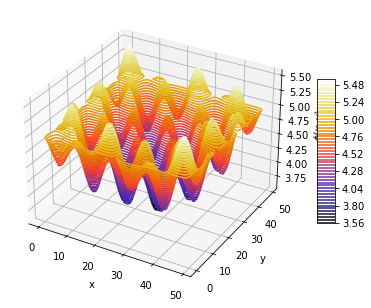

In [7]:
# Graficación
x = list(range(0, N))
y = list(range(0, N))            

#Creamos la maya en el plano XY            
X , Y = plt.meshgrid(x, y)            

def altura(lat):
    z = lat[X, Y]
    return z

#Encontremos la altura en cada punto (X,Y)
Z = altura(lat_new)

fig = plt.figure(1)
ax = Axes3D(fig)
surf1 = ax.contour(X, Y, Z, N, cmap=cm.CMRmap) 
fig.colorbar(surf1, shrink=0.5, aspect=8)
ax.contour(X, Y, Z, zdir='z', offset=-0)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('$\phi(x,y)$')
plt.show()